# PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
india_pca = pd.read_csv('./data/all_india_full.csv')
codings = india_pca

In [14]:
features = ['cv_'+str(i+1) for i in range(37)]
# Separating out the features
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['region']].values

In [15]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Vocal Complexity', 'Instrumentation'])

finalDf = pd.concat([principalDf, codings['region']], axis = 1)

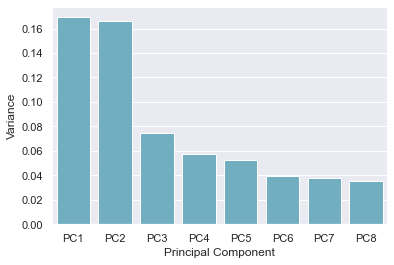

In [16]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8']}) 
sns.set(font='Arial')
sns.barplot(x='Principal Component',y="Variance", 
           data=df, color="c")

In [17]:
import matplotlib.pyplot as plt

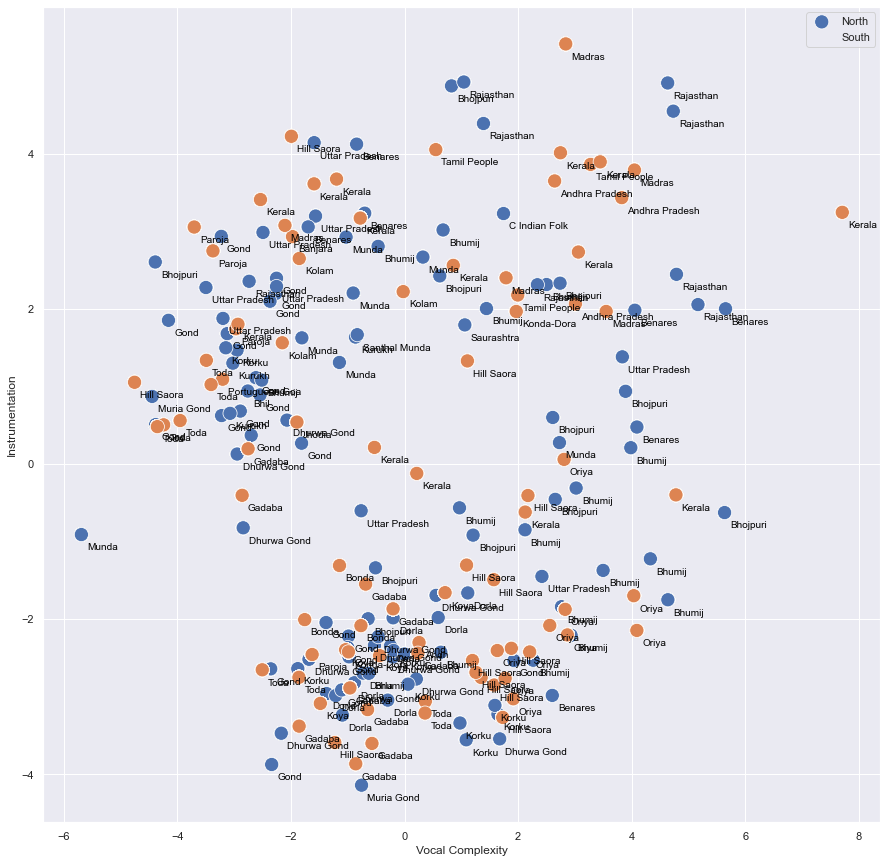

In [18]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['region']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['region'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Vocal Complexity']
               , finalDf.loc[indicesToKeep, 'Instrumentation'], hue=targets, s=200)

p1.set(xlabel='Vocal Complexity', ylabel='Instrumentation')

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Vocal Complexity']+0.1, finalDf.loc[line, 'Instrumentation']-0.2, codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle._size = [20.0]
                                    
plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/india_pca.png")

In [19]:
pca.explained_variance_

array([6.29375081, 6.16529046, 2.76106152, 2.13504833, 1.96164917,
       1.47799072, 1.40461748, 1.30069923])

In [20]:
pca.explained_variance_ratio_

array([0.16930558, 0.16584992, 0.07427417, 0.05743405, 0.05276951,
       0.03975881, 0.03778503, 0.03498957])

# Variable Loadings

In [21]:
line_metadata = pd.read_csv('./line_metadata.csv')
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/loadings.csv')

ValueError: Shape of passed values is (37, 8), indices imply (37, 2)

# PCA on Subset

In [161]:
drop_features = ['cv_1','cv_5','cv_6','cv_12','cv_22','cv_2','cv_3','cv_8','cv_9','cv_13','cv_14','cv_27']
subset = []
numbers = []
for i in range(1,38):
    feature = 'cv_'+str(i)
    if feature not in drop_features:
        subset.append(feature)
        numbers.append(i)

In [162]:
subset_df = pd.DataFrame(columns=line_metadata.columns)
for number in numbers:
    subset_df = subset_df.append(line_metadata.loc[number-1])
subset_df = subset_df.drop(columns=['var_definition']).reset_index().drop(columns=['index'])
subset_df.to_csv('./output/subset_metadata.csv')

In [163]:
x = codings.loc[:, subset].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['region']].values

In [164]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Melodic Complexity', 'Vocal Style'])

finalDf = pd.concat([principalDf, codings['region']], axis = 1)

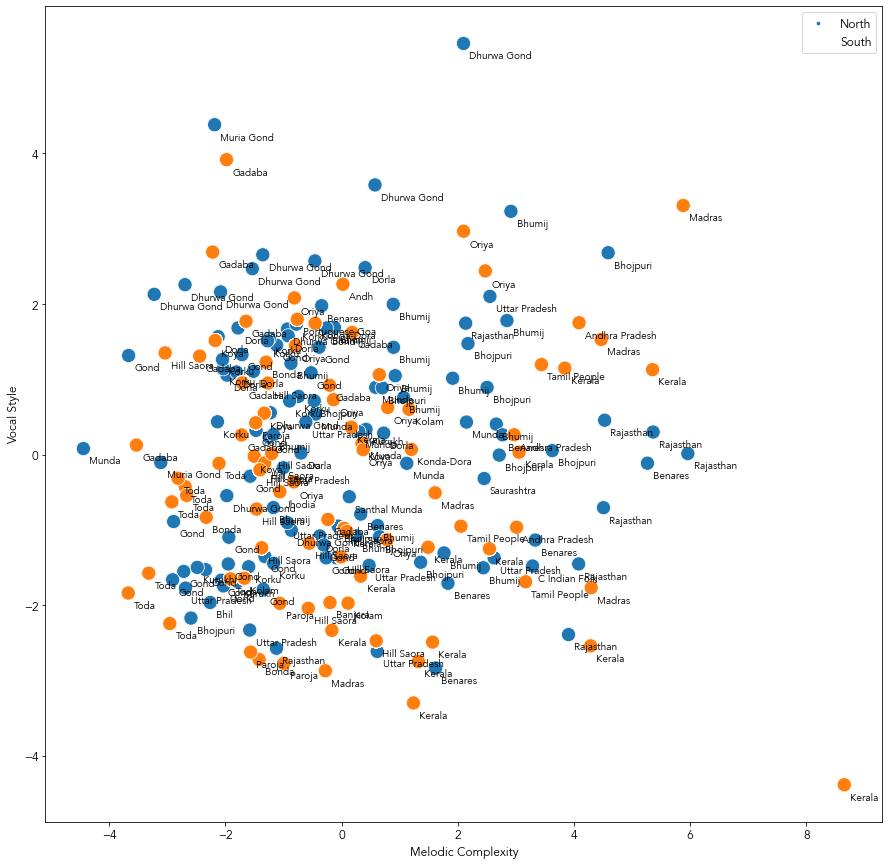

In [165]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['region']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['region'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Melodic Complexity']
               , finalDf.loc[indicesToKeep, 'Vocal Style'], hue=targets, s=200)

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Melodic Complexity']+0.1, finalDf.loc[line, 'Vocal Style']-0.2, codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/subset_pca.png")

## Explained Variance for Subset

In [153]:
pca.explained_variance_

array([4.96622096, 2.63624405])

In [154]:
pca.explained_variance_ratio_

array([0.1976938 , 0.10494279])

## Variable Loadings for Subset

In [165]:
subset_metadata = []
line_metadata = pd.read_csv('./line_metadata.csv')
for i, row in line_metadata.iterrows():
    linenum = 'cv_'+str(row['Unnamed: 0'])
    if linenum not in drop_features:
        subset_metadata.append(row['var_title'])

In [169]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=subset_metadata)
loadings.to_csv('./output/loadings_subset.csv')